In [22]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates

In [8]:
import locale
locale.setlocale(locale.LC_TIME, 'C')   # 强制英语环境

'C'

In [3]:
df = fetch_ucirepo(id=360).data.features 

In [4]:
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)
df.set_index('timestamp', inplace=True)

In [7]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
# replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

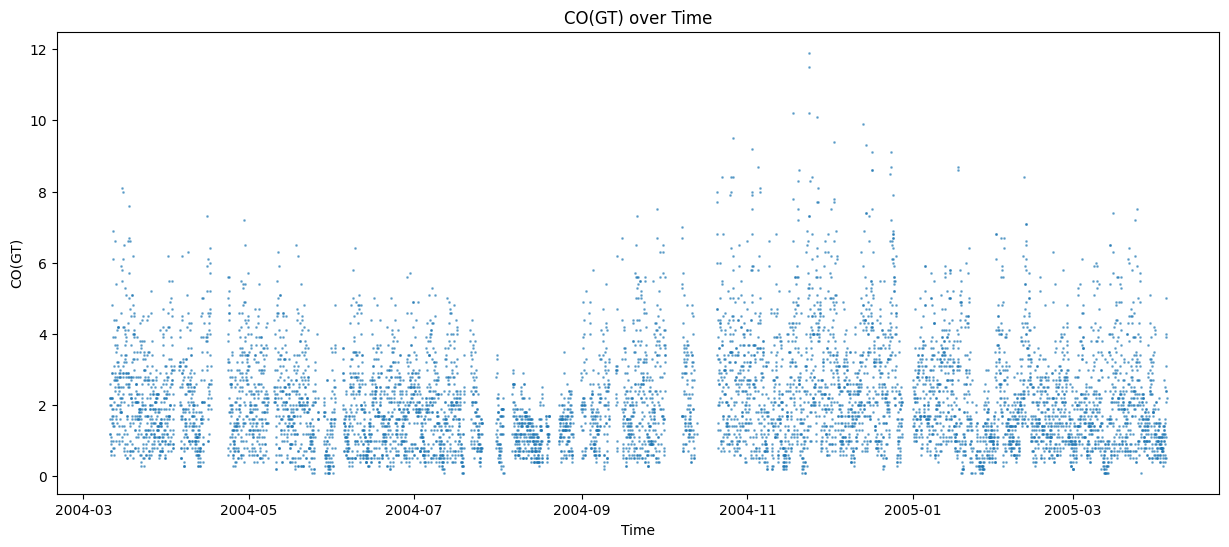

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['CO(GT)'], s=1, alpha=0.5)
plt.title('CO(GT) over Time')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.show()

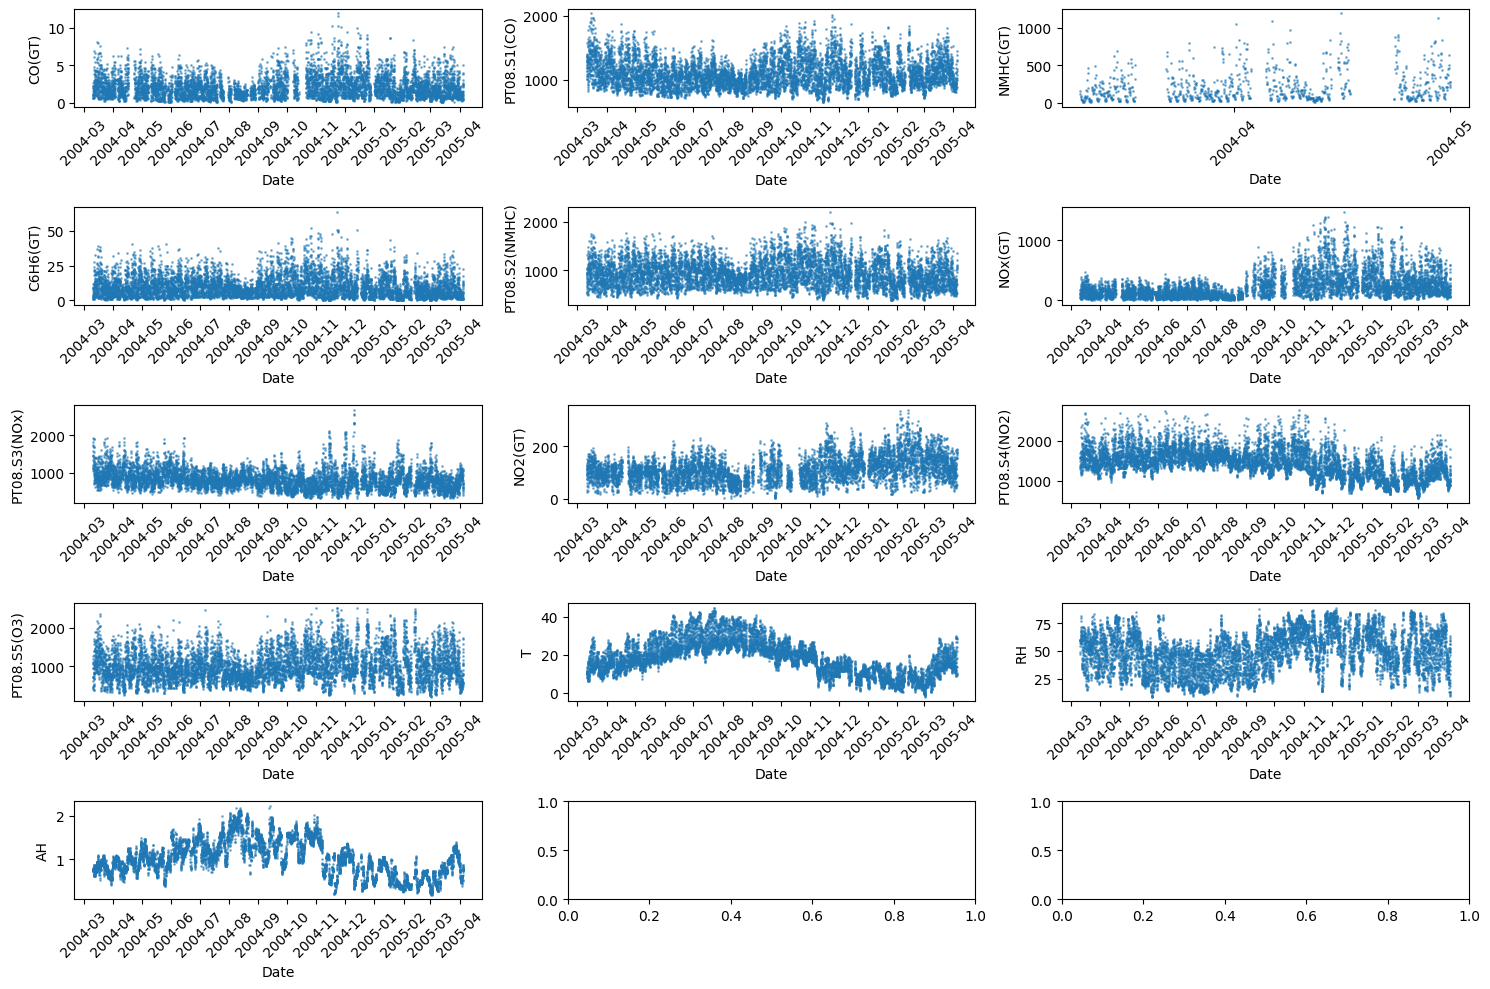

In [25]:
plt.subplots(5,3,figsize=(15, 10))
for i, column in enumerate(df.columns):
    ax = plt.subplot(5, 3, i + 1)
    ax.scatter(df.index, df[column], s=1, alpha=0.5)
    ax.set_xlabel('Time')
    ax.set_ylabel(column)
    ax.xaxis.set_major_locator(mdates.MonthLocator())               # 每个月显示一次
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))     # 格式为 2024-04

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Date")
plt.tight_layout()
plt.show()

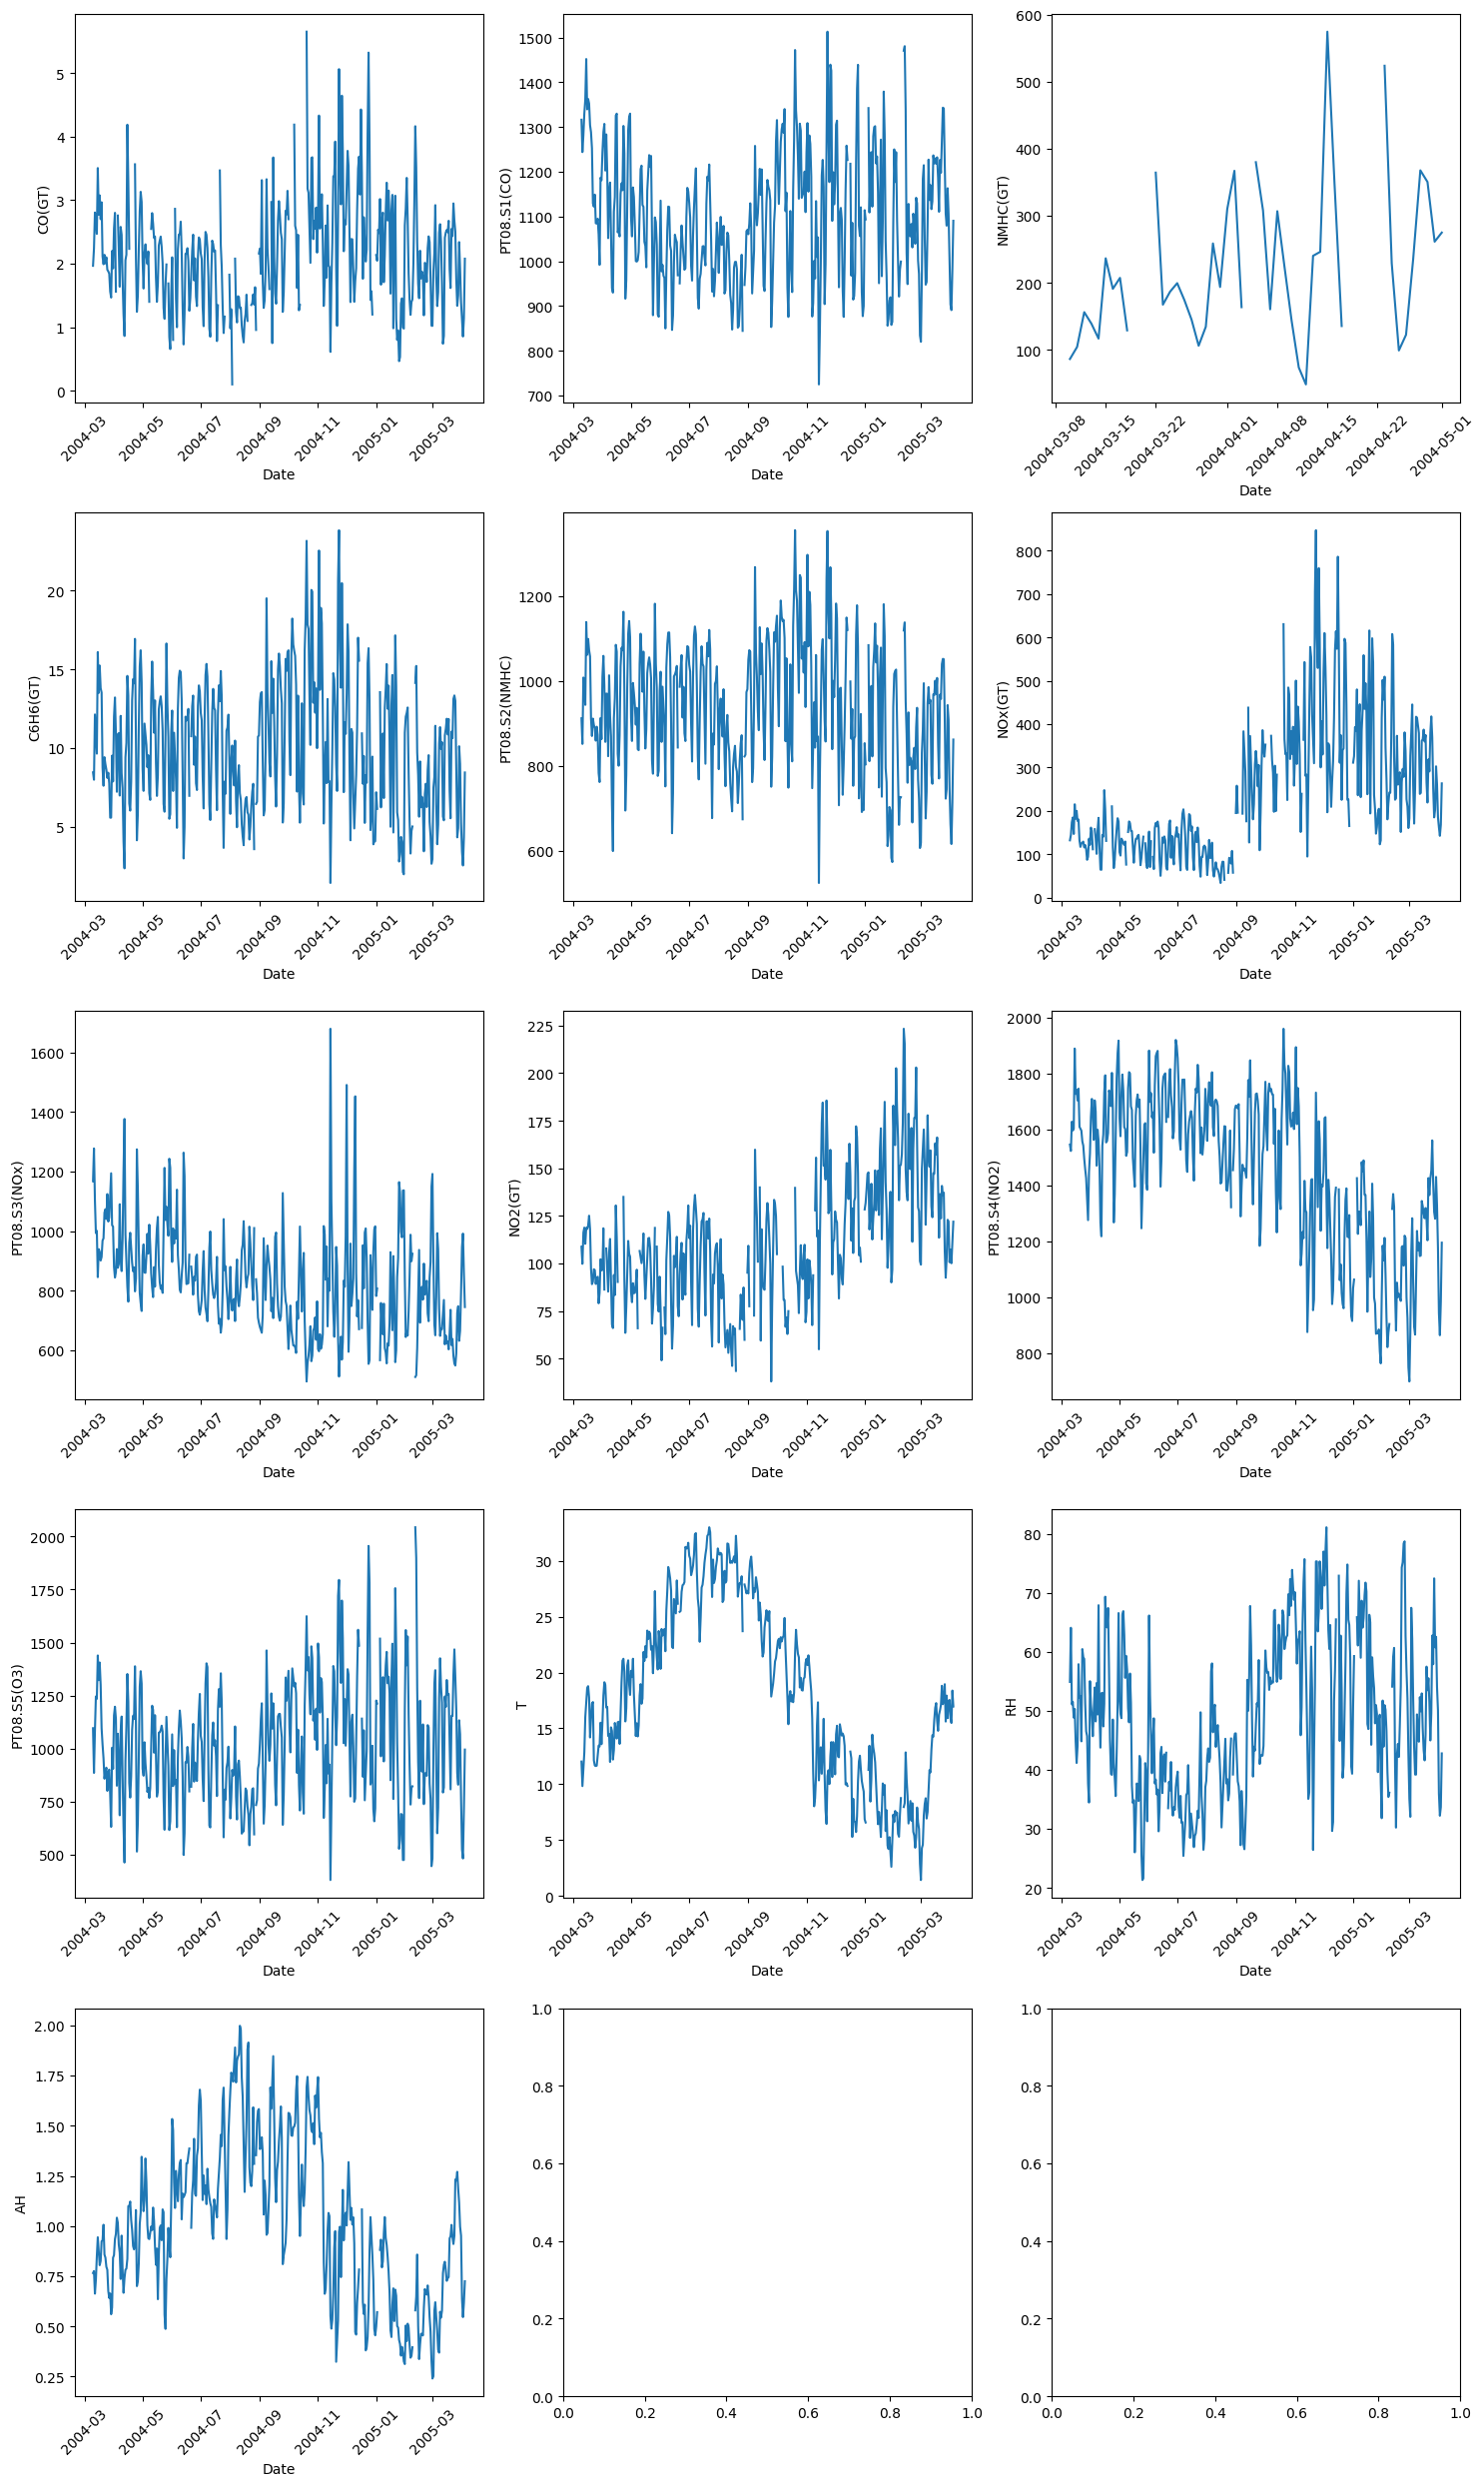

In [34]:
plt.subplots(5,3, figsize=(15, 25))
for i, column in enumerate(df.columns):
    ax = plt.subplot(5, 3, i + 1)
    ax.plot(df.groupby(df.index.date)[column].mean())
    ax.set_xlabel('Time')
    ax.set_ylabel(column)

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Date")
plt.tight_layout()
plt.show()

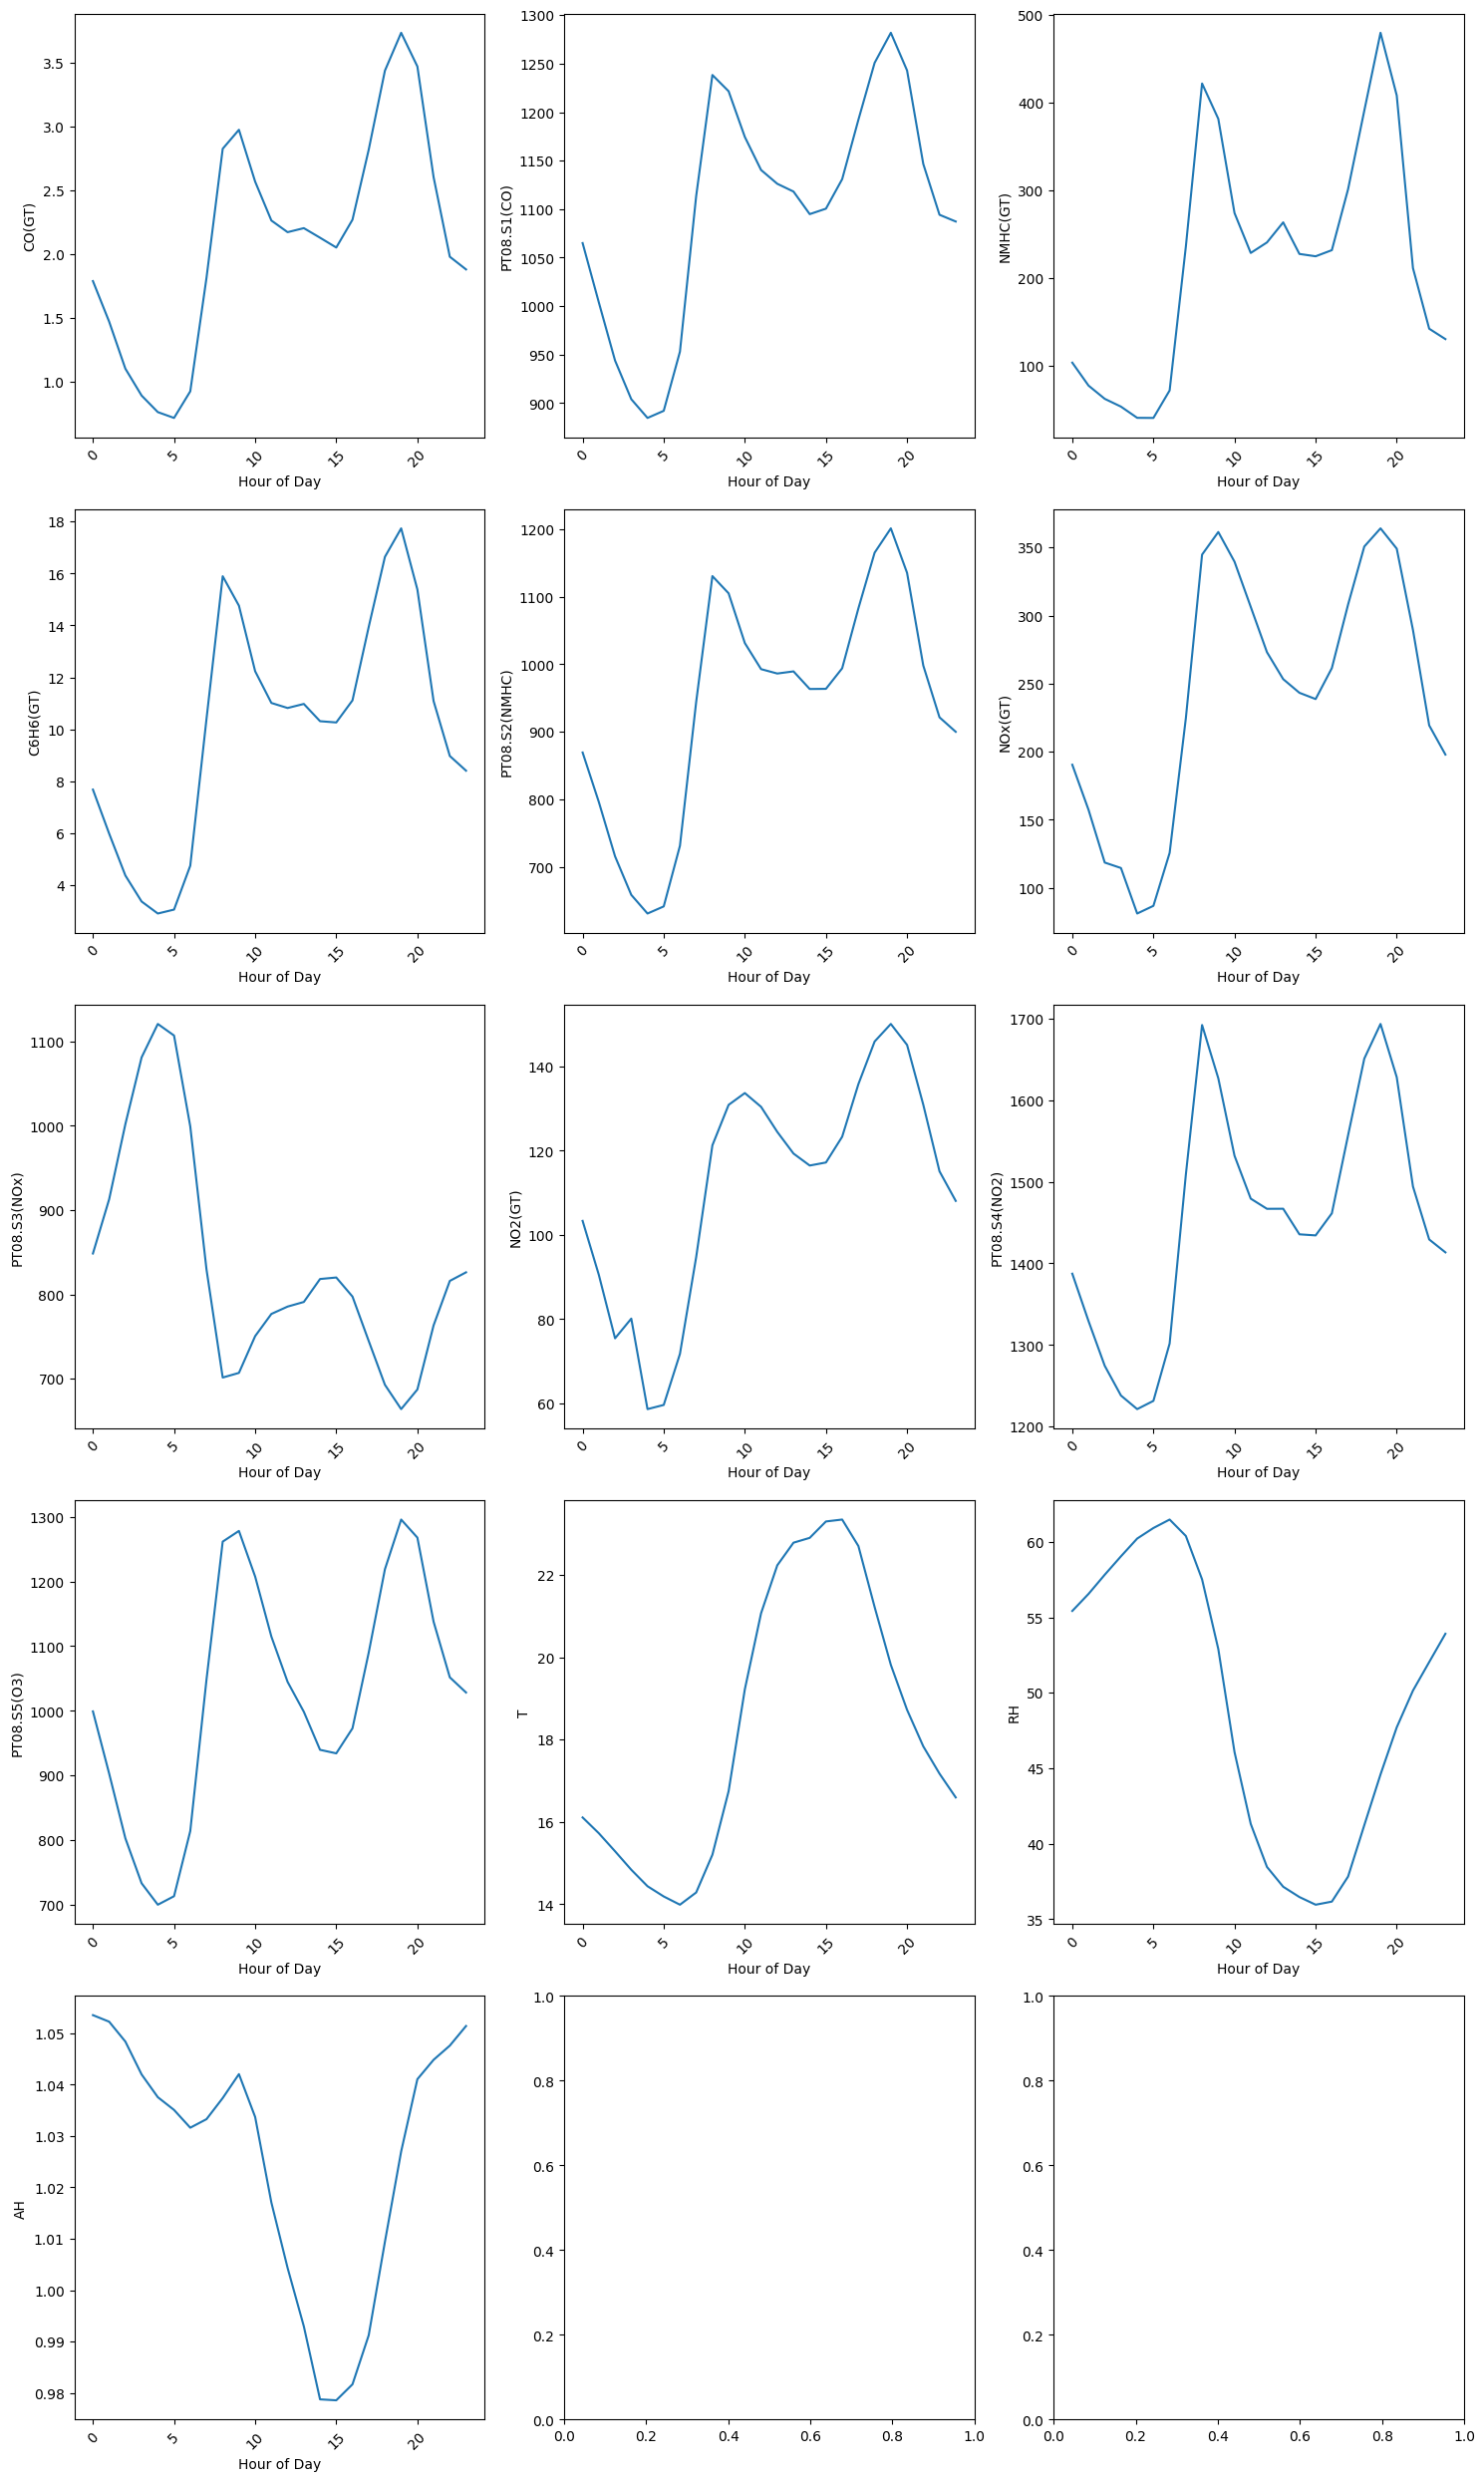

In [36]:
plt.subplots(5,3, figsize=(15, 25))
for i, column in enumerate(df.columns):
    ax = plt.subplot(5, 3, i + 1)
    ax.plot(df.groupby(df.index.hour)[column].mean())
    ax.set_xlabel('Time')
    ax.set_ylabel(column)

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Hour of Day")
plt.tight_layout()
plt.show()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['CO(GT)'].dropna(), model='additive', period=24)

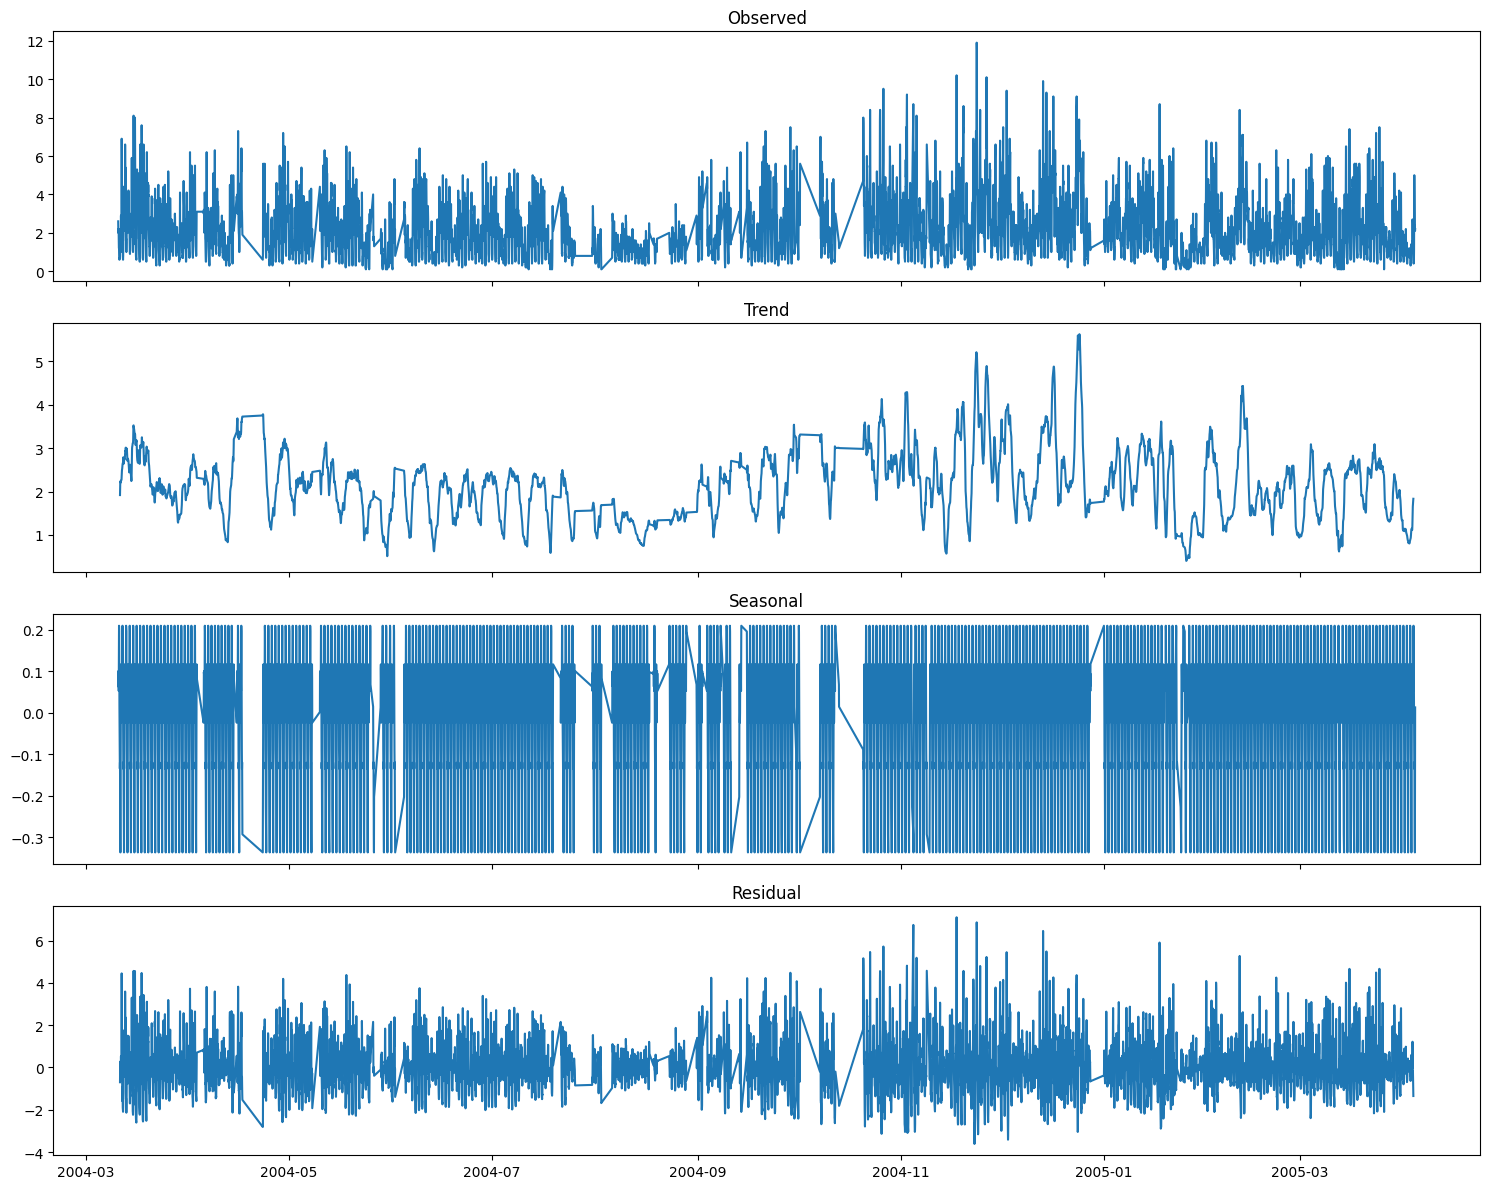

In [46]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

axes[0].plot(result.observed)
axes[0].set_title("Observed")

axes[1].plot(result.trend)
axes[1].set_title("Trend")

axes[2].plot(result.seasonal)
axes[2].set_title("Seasonal")

axes[3].plot(result.resid)
axes[3].set_title("Residual")

plt.tight_layout()
plt.show()